<a href="https://colab.research.google.com/github/GuimaraesDev/Projeto-NFL/blob/main/An%C3%A1liseNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nfl_data_py
!pip install pandas
!pip install os
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [ ]:
pbp = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


In [ ]:
pbp.shape

(49665, 390)

In [ ]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,None,None,None,None
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11.0,11.0,NaN,NaN,None,None,None,None
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11.0,11.0,NaN,NaN,None,None,None,None
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,4.53,2.169,False,HITCH,ZONE_COVERAGE,COVER_3
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,NaN,NaN,None,None,None,None


In [ ]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_players', 'defense_players', 'n_offense', 'n_defense',
       'ngs_air_yards', 'time_to_throw', 'was_pressure', 'route',
       'defense_man_zone_type', 'defense_coverage_type'],
      dtype='object', length=390)

In [ ]:
pbp.dtypes

play_id                  float32
game_id                   object
old_game_id               object
home_team                 object
away_team                 object
                          ...   
time_to_throw            float32
was_pressure              object
route                     object
defense_man_zone_type     object
defense_coverage_type     object
Length: 390, dtype: object

In [ ]:
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset = ['epa', 'posteam', 'defteam'])
pbp_rp.shape

(37053, 390)

In [ ]:
pass_epa = pbp_rp[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values('pass_epa', ascending = False)

<ipython-input-10-9ce2c2c2b6c6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pass_epa = pbp_rp[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})


,posteam,pass_epa
28,SF,0.288453
8,DAL,0.214838
11,GB,0.186362
3,BUF,0.163493
19,MIA,0.134578
10,DET,0.124473
29,TB,0.117349
15,KC,0.113611
16,LA,0.107296
2,BAL,0.098038


In [ ]:
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,ARI,-0.087735,-0.013017
1,ATL,-0.023836,-0.172797
2,BAL,0.098038,0.019594
3,BUF,0.163493,0.018618
4,CAR,-0.161010,-0.149338


In [ ]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [ ]:
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
  os.makedirs("logos")

for team in range(len(logos)):
  urllib.request,urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
  logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
  team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr': team_abbr, 'logo_path': logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')


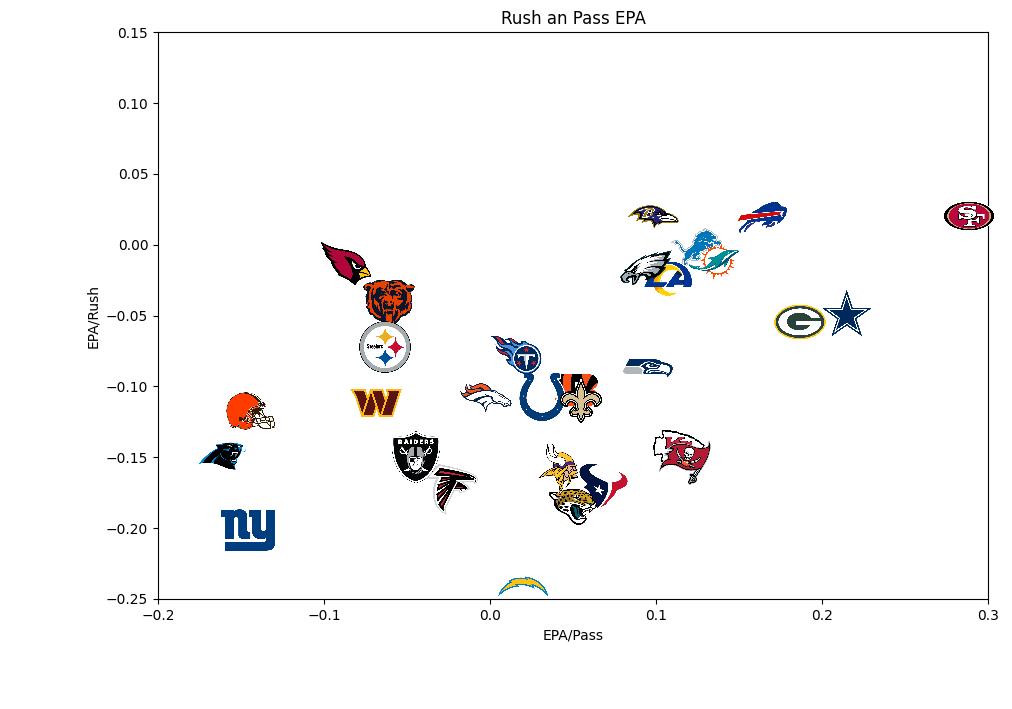

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.autolayout'] = True

def getImage(path):
  return OffsetImage(plt.imread(path, format = 'tif'), zoom = .08)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
  ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
  ax.add_artist(ab)

plt.xlim(-0.2, 0.3)
plt.ylim(-0.25, 0.15)
plt.title("Rush an Pass EPA")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")
plt.show()

In [ ]:
receiver_yac = pbp_rp[(pbp_rp['pass'] == 1)].groupby('receiver_player_name').agg({'pass' : 'count', 'yards_after_catch': 'sum'}).reset_index().rename(columns = {'pass': 'targets', 'yards_after_catch': 'yac'})
receiver_yac = receiver_yac[(receiver_yac['targets'] >= 1)]
receiver_yac.sort_values('yac', inplace = True)

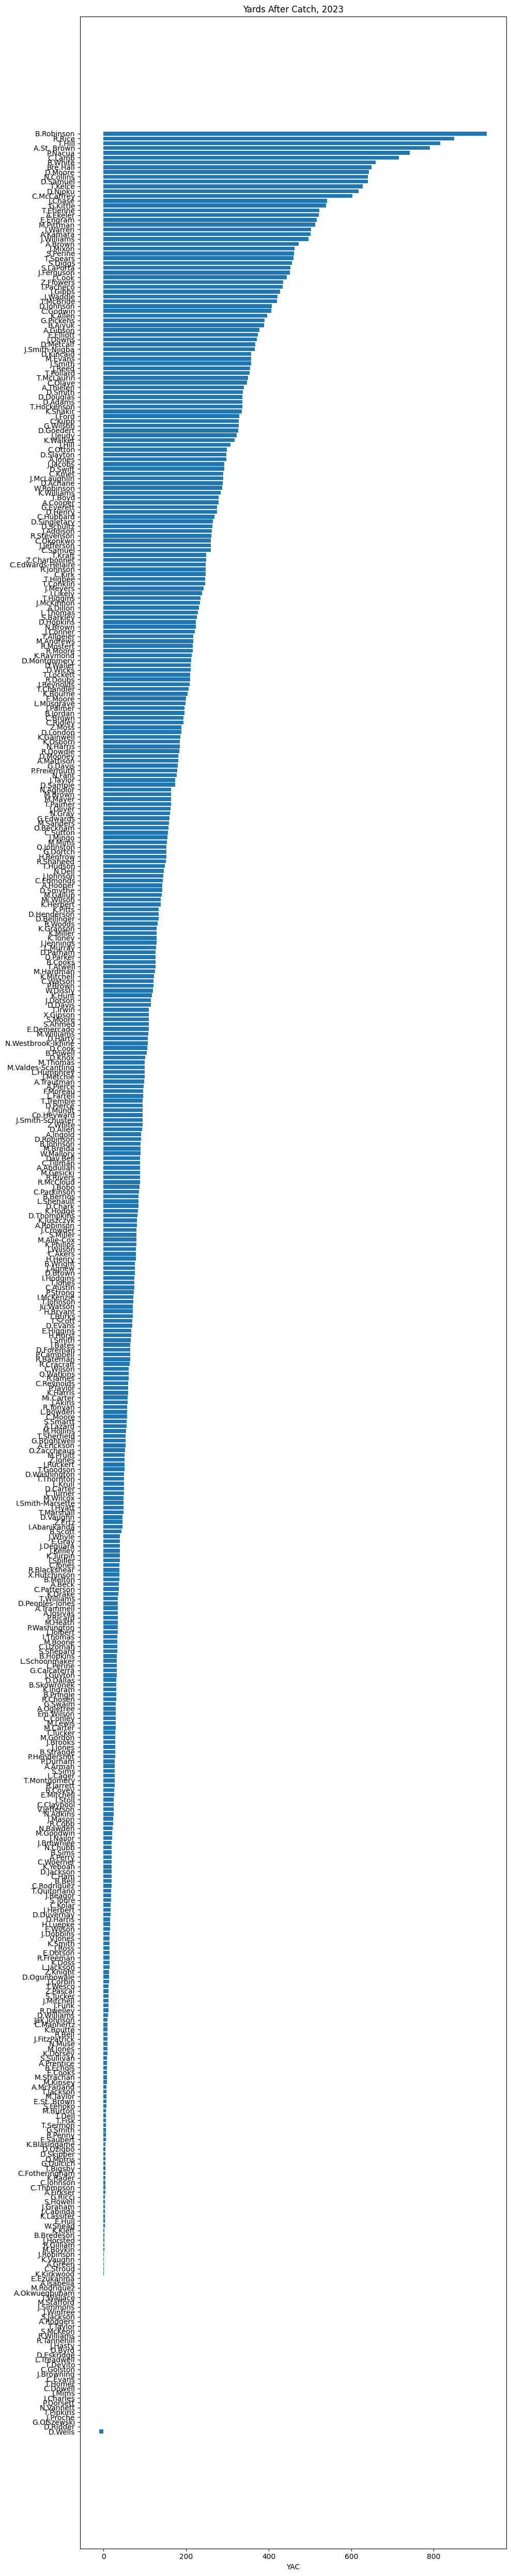

In [ ]:
name = receiver_yac['receiver_player_name']
yac = receiver_yac['yac']

fig, ax = plt.subplots(figsize = (10, 50))

ax.barh(name, yac)
ax.set_title("Yards After Catch, 2023")
ax.set_xlabel("YAC")
plt.show()